# FFT

In [2]:
import pandas as pd
import numpy as np
from numpy.fft import fftfreq
import matplotlib.pyplot as plt

In [3]:
def load_abs_ang(path):
    abs_ = []
    angle_ = []
    with open(path) as f:
        for line in f.readlines():
            ab, an = line.strip().split('\t')
            abs_.append(float(ab))
        angle_.append(float(an))
    
    return np.array(abs_), np.array(angle_)
    

py_version_path = './py_fft_magnitude.txt'
py_version_altered_path = './py_fft_magnitude_altered.txt'
c_version_path = './c_fft_magnitude.txt'
c_version_altered_path = './c_fft_magnitude_altered.txt'
c_version_decoded_path = './c_fft_magnitude_decoded.txt'


py_abs, py_angle = load_abs_ang(py_version_path)
py_abs_altered, _ = load_abs_ang(py_version_altered_path)
c_abs, c_angle = load_abs_ang(c_version_path)
c_abs_altered, _ = load_abs_ang(c_version_altered_path)
c_abs_decoded, c_angle_decoded = load_abs_ang(c_version_decoded_path)

x_fft_freq = fftfreq(c_abs.size)

In [4]:
len(py_abs), len(c_abs)

(1323000, 1323000)

C VERSION


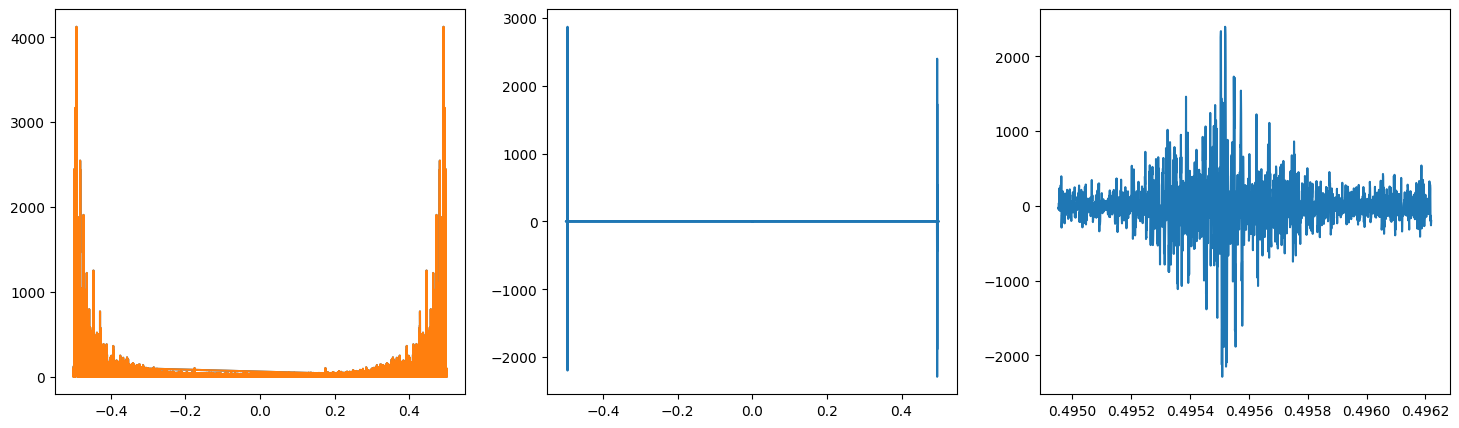

C DECODED VERSION


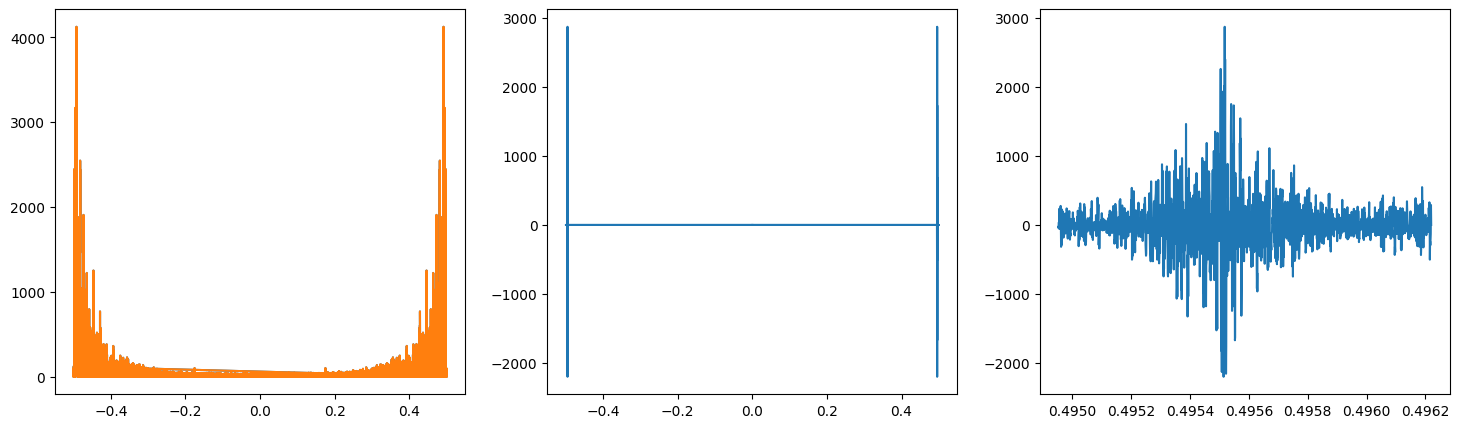

PY VERSION


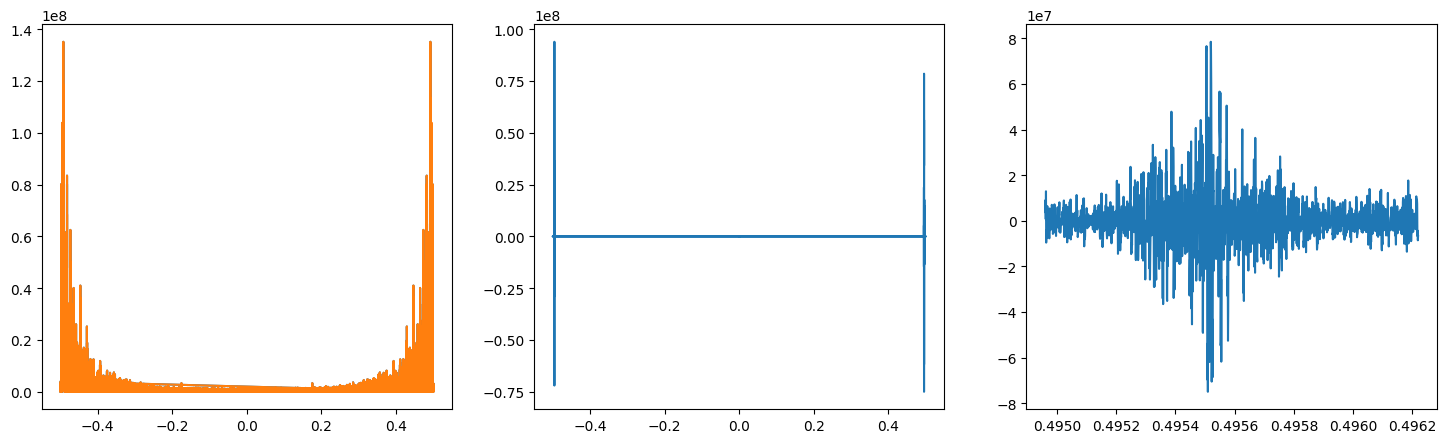

In [8]:
print("C VERSION")

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(x_fft_freq, c_abs)
plt.plot(x_fft_freq, c_abs_altered)

plt.subplot(1, 3, 2)
plt.plot(x_fft_freq, (c_abs - c_abs_altered))

start = 654821
end = 656500
plt.subplot(1, 3, 3)
plt.plot(x_fft_freq[start:end], (c_abs - c_abs_altered)[start:end])
plt.show()

print("C DECODED VERSION")

c_abs_decoded, c_angle_decoded
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(x_fft_freq, c_abs)
plt.plot(x_fft_freq, c_abs_altered)

plt.subplot(1, 3, 2)
plt.plot(x_fft_freq, (c_abs - c_abs_decoded))

start = 654821
end = 656500
plt.subplot(1, 3, 3)
plt.plot(x_fft_freq[start:end], (c_abs - c_abs_decoded)[start:end])
plt.show()

print("PY VERSION")
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.plot(x_fft_freq, py_abs)
plt.plot(x_fft_freq, py_abs_altered)

plt.subplot(1, 3, 2)
plt.plot(x_fft_freq, (py_abs - py_abs_altered))

start = 654831
end = 656500
plt.subplot(1, 3, 3)
plt.plot(x_fft_freq[start:end], (py_abs - py_abs_altered)[start:end])
plt.show()

In [10]:
print("Non zero ranges c:")
range_ = (c_abs - c_abs_altered) == 0
for i in range(1, len(range_)):
    previous, current = range_[i - 1], range_[i]
    if previous != current and previous:
        print("start =", i)
    elif previous != current and current:
        print("end =", i - 1)

print("Non zero ranges c_decoded:")
range_ = (c_abs - c_abs_decoded) == 0
for i in range(1, len(range_)):
    previous, current = range_[i - 1], range_[i]
    if previous != current and previous:
        print("start =", i)
    elif previous != current and current:
        print("end =", i - 1)

print("Non zero ranges py:")
range_ = (py_abs - py_abs_altered) == 0
for i in range(1, len(range_)):
    previous, current = range_[i - 1], range_[i]
    if previous != current and previous:
        print("start =", i)
    elif previous != current and current:
        print("end =", i - 1)

Non zero ranges c:
start = 654821
end = 656500
start = 666502
end = 668181
Non zero ranges c_decoded:
start = 654819
end = 656498
start = 666502
end = 668181
Non zero ranges py:
start = 654831
end = 656500
start = 666502
end = 668171


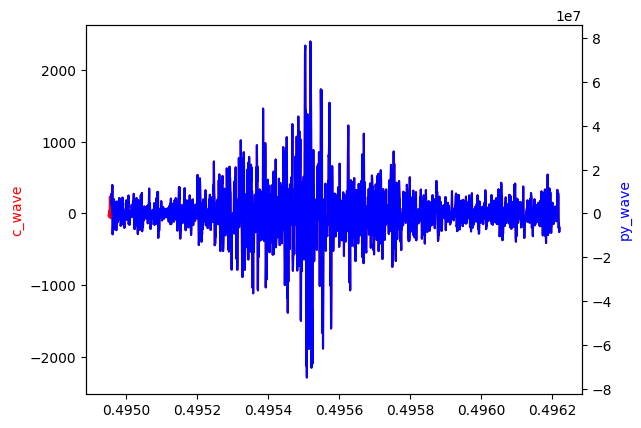

In [7]:
fig,ax = plt.subplots()

start = 654821
end = 656500
ax.plot(x_fft_freq[start:end], (c_abs - c_abs_altered)[start:end], color="red")
ax.set_ylabel("c_wave", color='red')

start = 654831
end = 656500
ax2=ax.twinx()
ax2.plot(x_fft_freq[start:end], (py_abs - py_abs_altered)[start:end], color="blue")
ax2.set_ylabel("py_wave", color="blue")
plt.show()

In [ ]:
fig,ax = plt.subplots()

start = 654821
end = 656500
ax.plot(x_fft_freq[start:end], (c_abs - c_abs_altered)[start:end], color="red")
ax.set_ylabel("c_wave", color='red')

start = 654819
end = 656498
ax2=ax.twinx()
ax2.plot(x_fft_freq[start:end], (c_abs - c_abs_decoded)[start:end], color="blue")
ax2.set_ylabel("c_decoded", color="blue")
plt.show()